# Plot LAS files #



### Import packages ###

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import welly
from welly import Well,Project
from striplog import Legend, Striplog, Lexicon, Component, Decor


### Import and plot geophysical logs from one LAS file with multiple parameters ###
LAS files can be downloaded from MGS Borehole Geophysical Database, or the URL to the file can be directly provided.

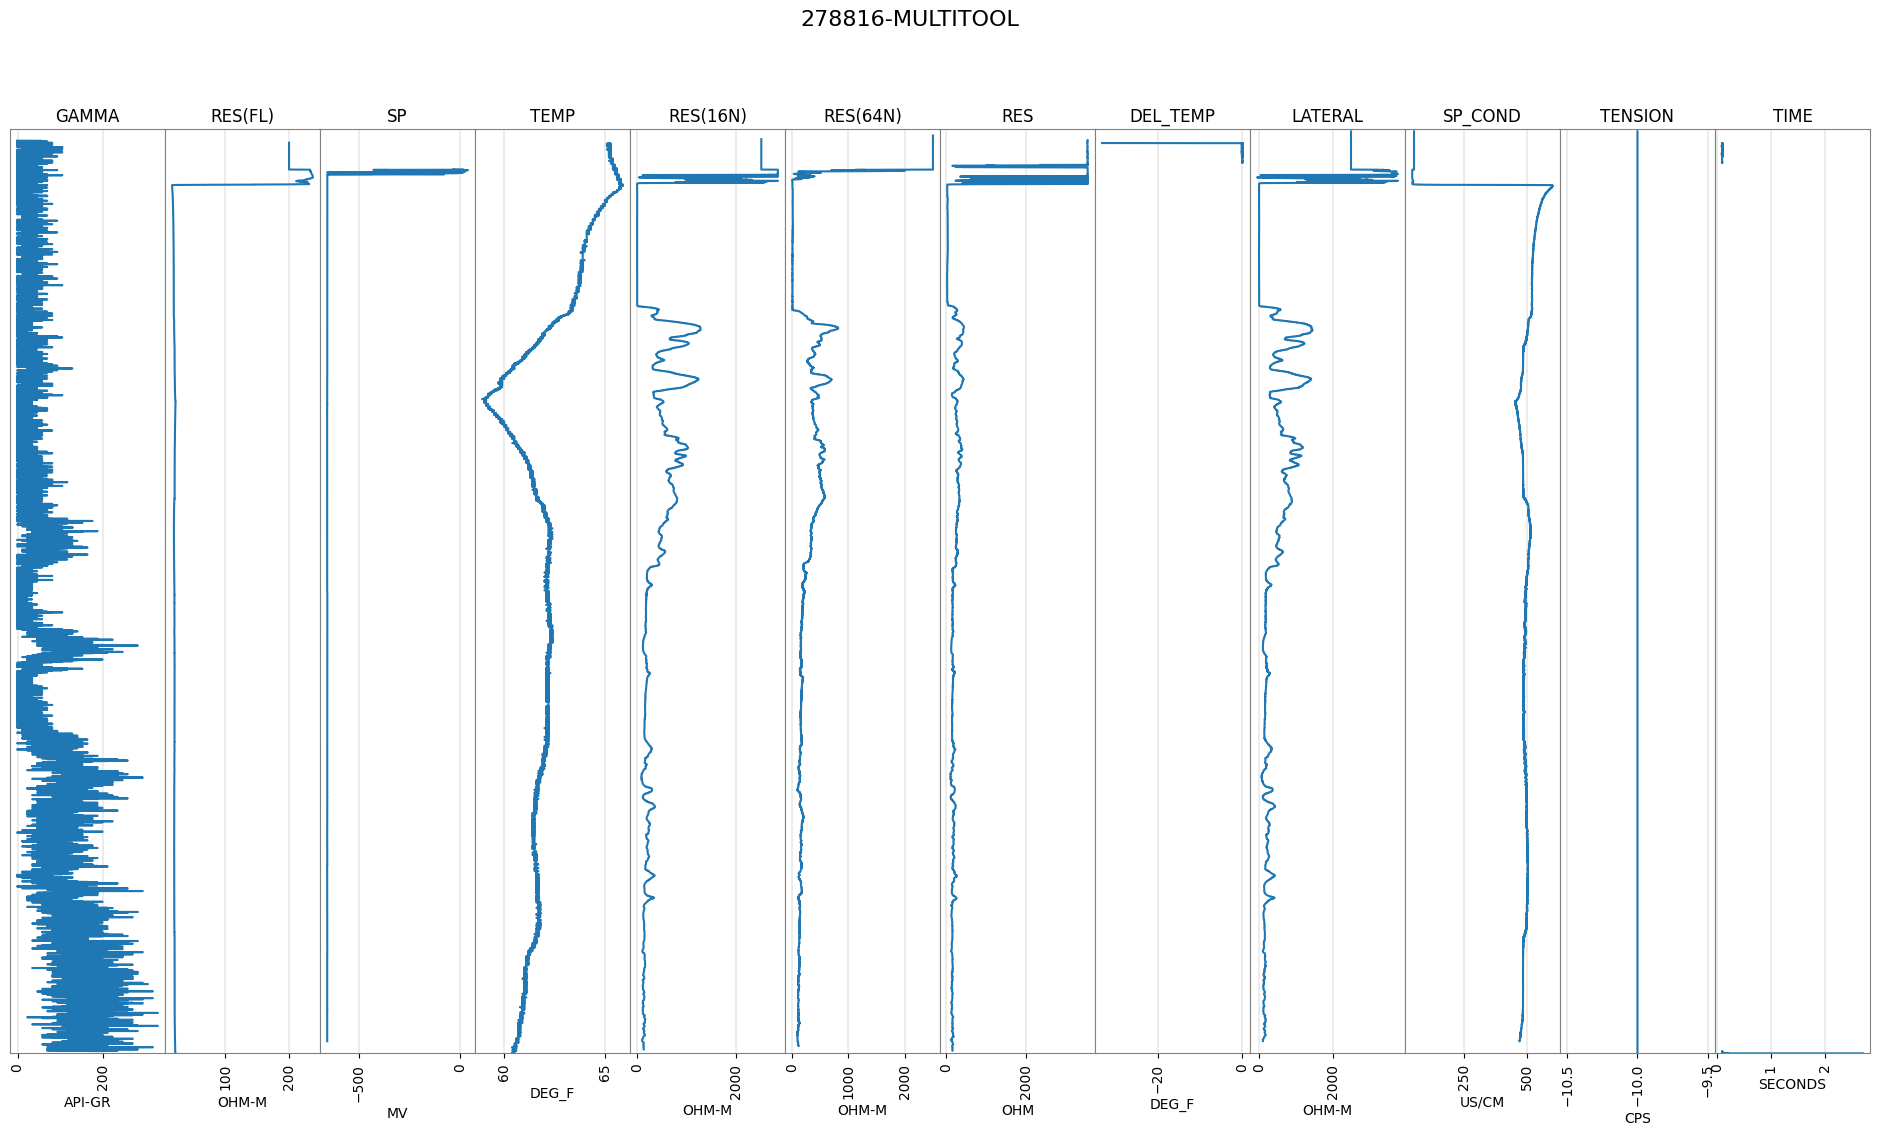

In [58]:
well = Well.from_las('wells/278816_CALIPER_8-15-2017.las') #import one well log from downloaded .las file
#well = Well.from_las('http://mgs-gispub.mngs.umn.edu/Geophysical_logs/Multitool/las/278816_MULTI_8-15-2017.las') #import from online MGS database
well.plot()              #plot all data in file

### Import and plot one striplog from stratigraphy csv file ###
In this example, I looked at the stratigraphy report PDF file and manually converted it to a csv. 
If doing a large number of logs, it would be worth automating this process.
The csv file format should have the following column headers:
- top: depth to the top of the unit
- base: depth to the base of the unit
- comp stratigraphy: for this example, use Minnesota Geological Survey four-letter unit codes. Including "comp" at the beginning of a column tells striplog to read in that column when defining component objects that can then be mapped to legend objects for plotting. To ignore a column, don't put "comp" in the name.
- comp lithology: sandstone, limestone, etc. See striplog documentation for a list of accepted terms.
- optional: secondary lithology


In [48]:
legend = Legend.from_csv(filename='wells/legend.csv') #create custom legend from csv
legend

Legend(Decor({'_colour': '#bfa743', 'hatch': '.', 'component': Component({'stratigraphy': 'quuu', 'lithology': 'glacial drift'}), 'width': None})
Decor({'_colour': '#00af89', 'hatch': 's', 'component': Component({'stratigraphy': 'opdc', 'lithology': 'dolostone'}), 'width': None})
Decor({'_colour': '#00baa0', 'hatch': 's', 'component': Component({'stratigraphy': 'opod', 'lithology': 'dolostone'}), 'width': None})
Decor({'_colour': '#e5f1d1', 'hatch': '..', 'component': Component({'stratigraphy': 'cjdn', 'lithology': 'sandstone'}), 'width': None})
Decor({'_colour': '#81aa72', 'hatch': '==', 'component': Component({'stratigraphy': 'cstl', 'lithology': 'siltstone'}), 'width': None})
Decor({'_colour': '#95c28f', 'hatch': '..', 'component': Component({'stratigraphy': 'ctcg', 'lithology': 'sandstone'}), 'width': None}))

C:\Users\cfandel\Anaconda3\envs\geothermal\lib\site-packages\striplog\striplog.py:512: UserWarning: No lexicon provided, using the default.
  warnings.warn(w)


[Component({'stratigraphy': 'CTCG', 'lithology': 'sandstone'}), Component({'stratigraphy': 'OPOD', 'lithology': 'dolostone'}), Component({'stratigraphy': 'CJDN', 'lithology': 'sandstone'}), Component({'stratigraphy': 'QUUU', 'lithology': 'glacial drift'}), Component({'stratigraphy': 'OPDC', 'lithology': 'dolostone'}), Component({'stratigraphy': 'CSTL', 'lithology': 'siltstone'})]


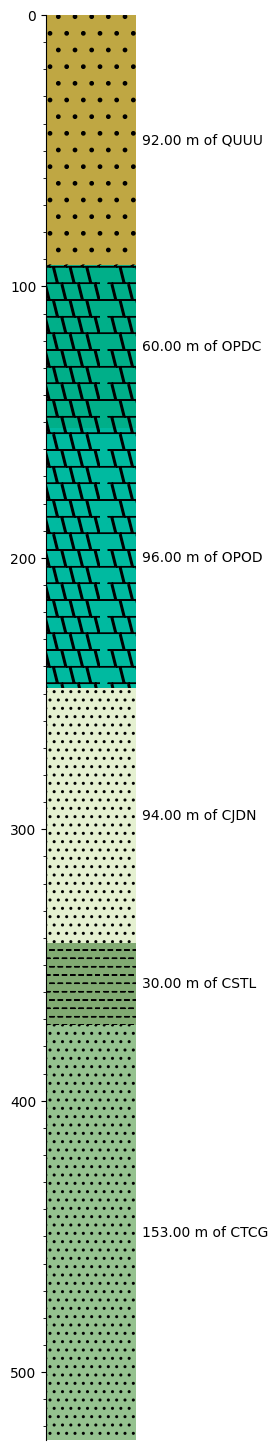

In [52]:
strip = Striplog.from_csv(filename='wells/278816_strat.csv') #load striplog from stratigraphy csv file
print(strip.components)
strip.plot(legend=legend, label='{stratigraphy}')

In [53]:
project = Project.from_las('wells/278816*.las')     # Load all las files in folder with specified well id in their name 
strip = Striplog.from_csv(filename='wells/278816_strat.csv') #load striplog from stratigraphy csv file
legend = Legend.from_csv(filename='wells/legend.csv') #import legend from csv

3it [00:01,  1.88it/s]
C:\Users\cfandel\Anaconda3\envs\geothermal\lib\site-packages\striplog\striplog.py:512: UserWarning: No lexicon provided, using the default.
  warnings.warn(w)


<AxesSubplot:title={'center':'GAMMA'}, xlabel='API-GR'>

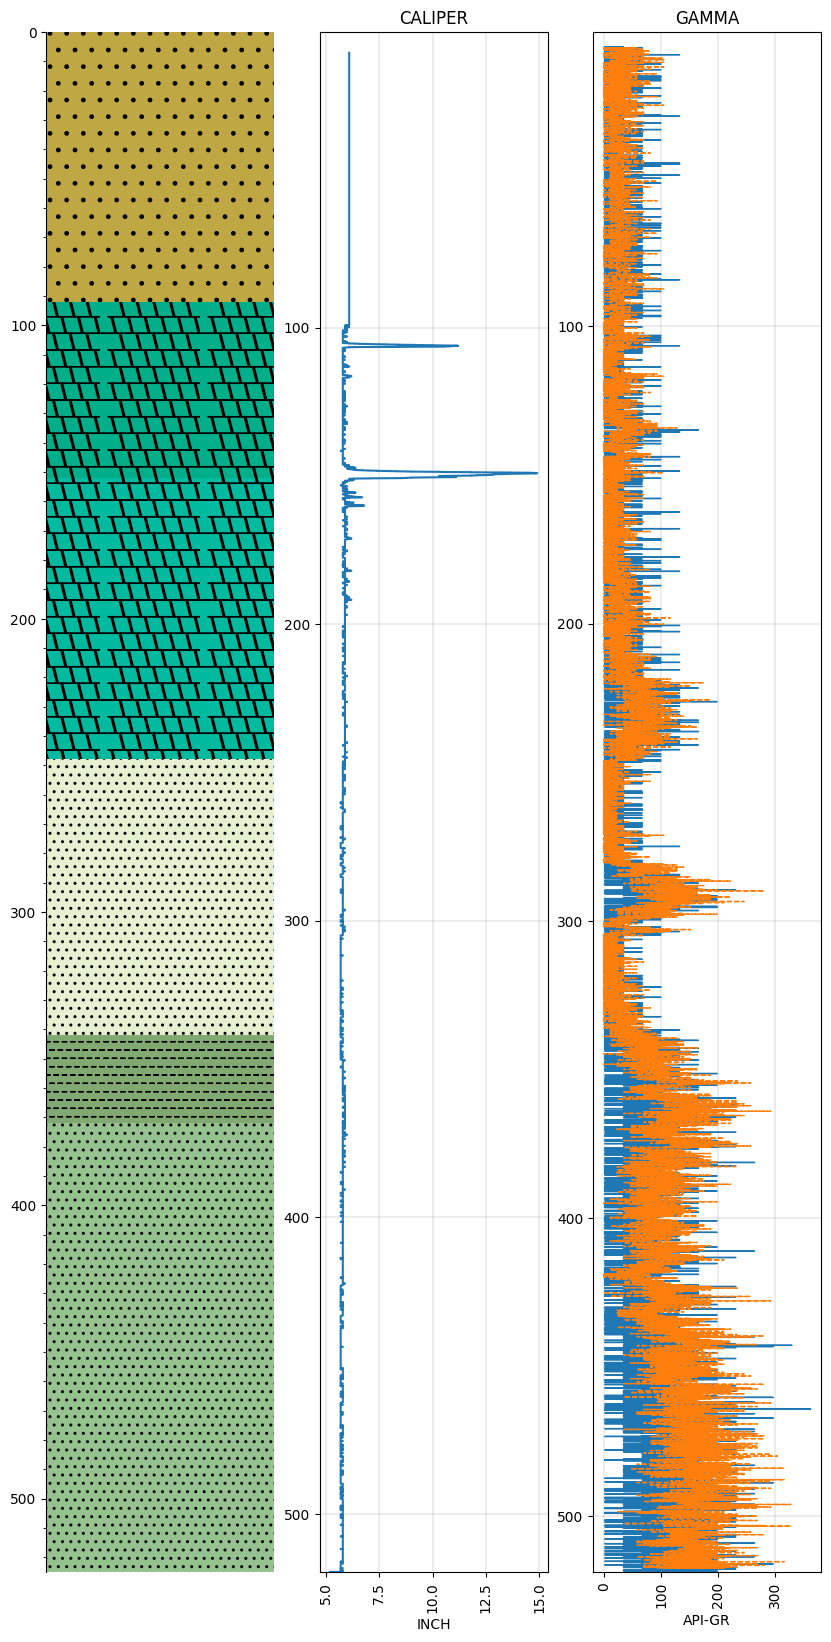

In [57]:
f, ax = plt.subplots(1,3, figsize=(10,20))   #make a figure object with several axes for subplots

strip.plot(ax=ax[0], legend=legend)  #plot the striplog

caliper = project[0].data['CALIPER']  #pull out data for just the caliper log
caliper.plot(ax=ax[1])                      #plot it
gamma1 = project[1].data['GAMMA']  #pull out data for just the gamma log
gamma1.plot(ax=ax[2], lw=1)                      #plot it
gamma2 = project[2].data['GAMMA']  #pull out data for just the gamma log from the multiprobe
gamma2.plot(ax=ax[2], lw=1, ls='--')                      #plot it on same axes as first gamma log